In [1]:
import numpy as np
import pandas as pd

In [31]:
# 2. Retrieve the Starbucks dataset from this link and load it into a DataFrame named ‘starbucks’.
# link = "https://github.com/reisanar/datasets/blob/master/starbucks.csv"
#raw data url:
url = "https://raw.githubusercontent.com/reisanar/datasets/master/starbucks.csv"
starbucks = pd.read_csv(url)

In [32]:
# 3. Display the first 10 entries of the DataFrame using the head() function.
print(starbucks.head(10))

         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   
5  Classic Espresso Drinks    Caffè Latte            2% Milk       100   
6  Classic Espresso Drinks    Caffè Latte            Soymilk        70   
7  Classic Espresso Drinks    Caffè Latte   Tall Nonfat Milk       100   
8  Classic Espresso Drinks    Caffè Latte            2% Milk       150   
9  Classic Espresso Drinks    Caffè Latte            Soymilk       110   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0               

In [33]:
# 4. Determine the total number of entries in 'starbucks'
total_entries = len(starbucks)
print("Total number of entries:", total_entries)

Total number of entries: 242


In [35]:
# 5. Print all the column names in the DataFrame
column_names = starbucks.columns
print("column names:", column_names)

column names: Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [36]:
# 6. Find out how the DataFrame is indexed
index_info = starbucks.index
print("index info:", index_info)

index info: RangeIndex(start=0, stop=242, step=1)


In [39]:
# 7. Determine the drink that contains the most amount of sugar on average.
max_sugars = starbucks[' Sugars (g)'].max()
print("max Sugar, g':", max_sugars)

max Sugar, g': 84


In [41]:
# 8.  Find out how many different drink categories there are. Use the nunique() function for this.
num_cat = starbucks['Beverage_category'].nunique()
print("Number of different drink categories:", num_cat)

Number of different drink categories: 9


In [45]:
# 9. Identify the 5 most frequent drink categories.
# Use value_counts() to get the frequency of each drink category
cat_count = starbucks['Beverage_category'].value_counts()
# print(category_counts)
# Select the top 5 most frequent drink categories
top_cat = cat_count.head(5)

print("5 most frequent drink categories:")
print(top_cat)

5 most frequent drink categories:
Classic Espresso Drinks        58
Tazo® Tea Drinks               52
Signature Espresso Drinks      40
Frappuccino® Blended Coffee    36
Shaken Iced Beverages          18
Name: Beverage_category, dtype: int64


In [47]:
# 10. Find out the average calorie content per drink category.
average_cal = starbucks.groupby('Beverage_category')['Calories'].mean()

print("Average calories:")
print(average_cal)

Average calories:
Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64


In [51]:
# 11. Create a new column ‘caffeine_to_calories’ that represents the ratio of caffeine to calories in each drink.

starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')
starbucks['Calories'] = pd.to_numeric(starbucks['Calories'], errors='coerce')
starbucks['caffeine_to_calories'] = starbucks['Caffeine (mg)'] / starbucks['Calories']
# updated  starbucks with new column
print(starbucks.head())

         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   


In [57]:
# 12. Find the drink category that, on average, has the highest ‘caffeine_to_calories’ ratio.
max_ratio_index = starbucks['caffeine_to_calories'].idxmax()
b_cat = starbucks.loc[max_ratio_index , 'Beverage_category']

print(max_ratio_index)
print(b_cat)

3
Coffee


Beverage_category
Classic Espresso Drinks               2.265648
Coffee                               67.833333
Frappuccino® Blended Coffee           0.369619
Frappuccino® Blended Crème            0.000000
Frappuccino® Light Blended Coffee     0.630924
Shaken Iced Beverages                 1.370522
Signature Espresso Drinks             0.317300
Smoothies                             0.019927
Tazo® Tea Drinks                      0.221908
Name: caffeine_to_calories, dtype: float64


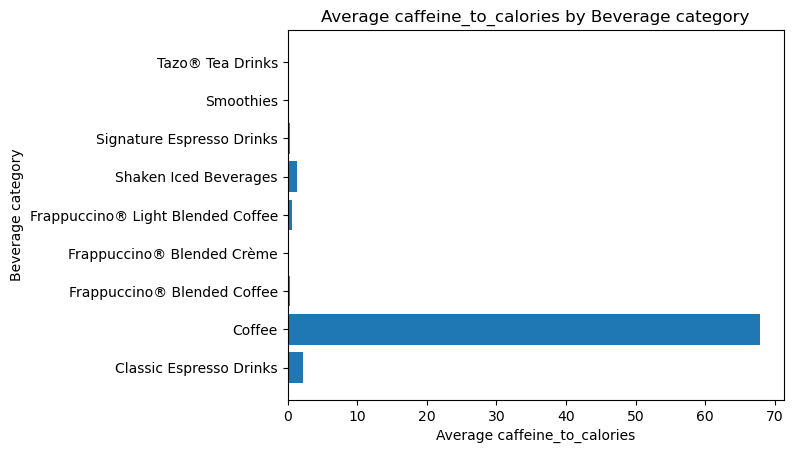

In [62]:
# 13. Create a horizontal bar plot that shows the average ‘caffeine_to_calories’ ratio 
# for each drink category. Use matplotlib’s barh() function for this.

import matplotlib.pyplot as plt


# Find out the average ‘caffeine_to_calories’ per drink category.
average_c_t_c = starbucks.groupby('Beverage_category')['caffeine_to_calories'].mean()
print(average_c_t_c)

# Create a horizontal bar plot
plt.barh(average_c_t_c.index, average_c_t_c.values)
plt.xlabel('Average caffeine_to_calories')
plt.ylabel('Beverage category')
plt.title('Average caffeine_to_calories by Beverage category')
plt.show()

In [71]:
# 14. Formulate and answer a question about the dataset. 
# For example, “What is the relationship between sugar and caffeine across different drink categories?”

# Find out the average ‘caffeine_to_sugar’ per drink category.
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')
starbucks[' Sugars (g)'] = pd.to_numeric(starbucks[' Sugars (g)'], errors='coerce')
# starbucks['caffeine_to_sugar'] = starbucks['Caffeine (mg)'] / starbucks[' Sugars (g)']

starbucks['caffeine_to_sugar'] = np.where(starbucks[' Sugars (g)'] != 0, starbucks['Caffeine (mg)']/starbucks[' Sugars (g)'],0)

average_c_t_s = starbucks.groupby('Beverage_category')['caffeine_to_sugar'].mean()
print(average_c_t_s)

Beverage_category
Classic Espresso Drinks              7.732084
Coffee                               0.000000
Frappuccino® Blended Coffee          1.782673
Frappuccino® Blended Crème           0.000000
Frappuccino® Light Blended Coffee    3.097255
Shaken Iced Beverages                6.087613
Signature Espresso Drinks            2.268616
Smoothies                            0.166307
Tazo® Tea Drinks                     1.144976
Name: caffeine_to_sugar, dtype: float64


Beverage_category
Classic Espresso Drinks              7.732084
Coffee                               0.000000
Frappuccino® Blended Coffee          1.782673
Frappuccino® Blended Crème           0.000000
Frappuccino® Light Blended Coffee    3.097255
Shaken Iced Beverages                6.087613
Signature Espresso Drinks            2.268616
Smoothies                            0.166307
Tazo® Tea Drinks                     1.144976
Name: caffeine_to_sugar, dtype: float64


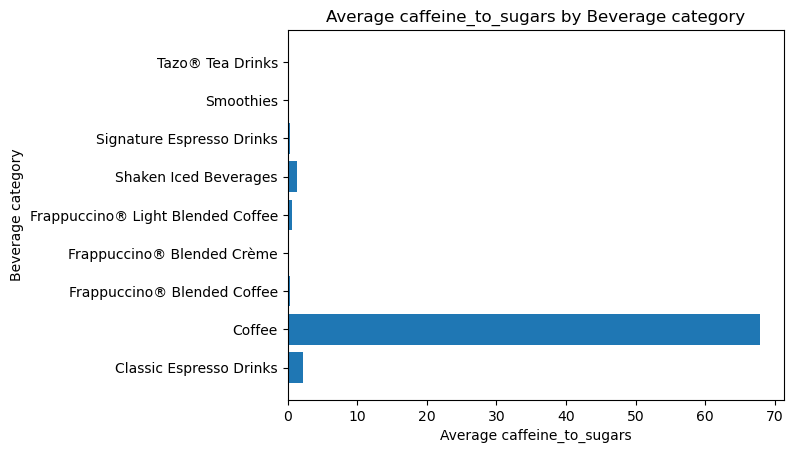

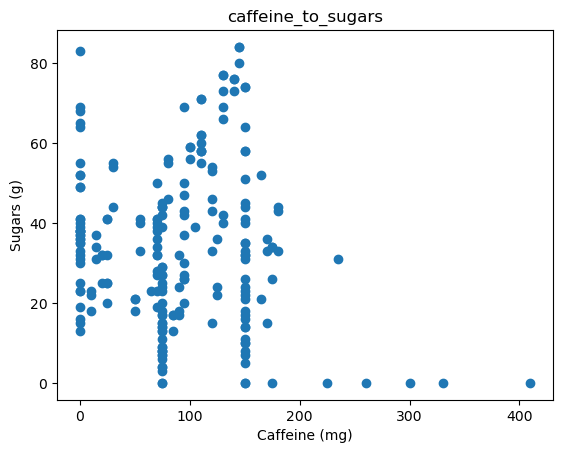

In [77]:
# 14. Formulate and answer a question about the dataset. 
# For example, “What is the relationship between sugar and caffeine across different drink categories?”

# Find out the average ‘caffeine_to_sugar’ per drink category.
starbucks['Caffeine (mg)'] = pd.to_numeric(starbucks['Caffeine (mg)'], errors='coerce')
starbucks[' Sugars (g)'] = pd.to_numeric(starbucks[' Sugars (g)'], errors='coerce')

starbucks['caffeine_to_sugar'] = np.where(starbucks[' Sugars (g)'] != 0, starbucks['Caffeine (mg)']/starbucks[' Sugars (g)'],0)

average_c_t_s = starbucks.groupby('Beverage_category')['caffeine_to_sugar'].mean()
print(average_c_t_s)


# Create a horizontal bar plot
plt.barh(average_c_t_c.index, average_c_t_c.values)
plt.xlabel('Average caffeine_to_sugars')
plt.ylabel('Beverage category')
plt.title('Average caffeine_to_sugars by Beverage category')
plt.show()

x= starbucks['Caffeine (mg)']
y= starbucks[' Sugars (g)']
plt.scatter(x,y)
plt.xlabel('Caffeine (mg)')
plt.ylabel('Sugars (g)')
plt.title('caffeine_to_sugars')
plt.show()
